# Feature Scaling

## There are two types of feature scaling
#### 1. Standardization or Z-Score Normalizatiion
#### 2. Normalization
   - Min-Max Normalization
   - Robust Scaler

# Standardization or Z-Score Normalization

<img src="./images/standardization.png" />

### Properties of scaled values
- have new mean = 0
- have new standard deviation = 1

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('./data/social-network-ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [11]:
df=df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [12]:
df.sample(5)


,Age,EstimatedSalary,Purchased
60,27,20000,0
113,37,55000,0
202,39,134000,1
96,35,25000,0
91,30,116000,0


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [34]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [35]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [36]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [37]:
np.round(X_train.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,38.0,69807.0
std,10.0,34641.0
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [38]:
np.round(X_train_scaled.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,0.0
75%,1.0,1.0
max,2.0,2.0


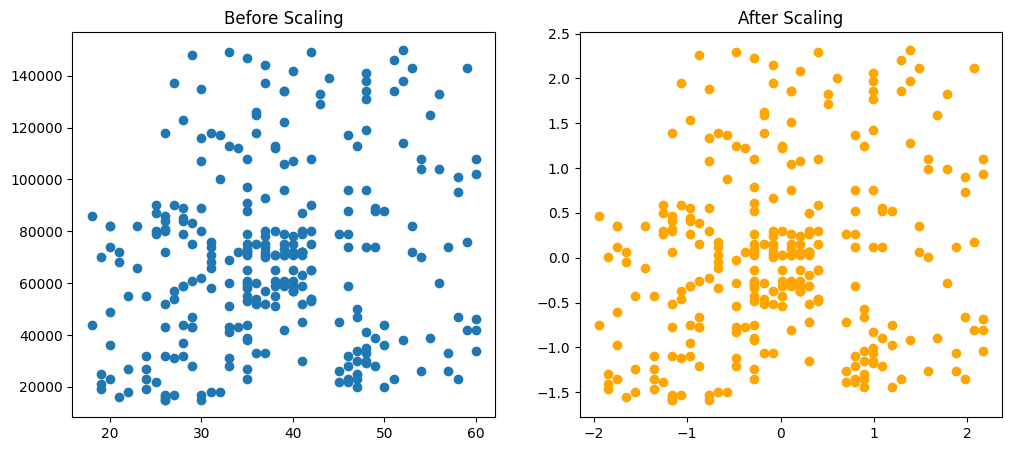

In [44]:
def plot_standardization():

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
    ax1.set_title("Before Scaling")
    
    ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='orange')
    ax2.set_title("After Scaling")
    
    plt.show()
    
plot_standardization()

### There is no effect on form of data after standardization

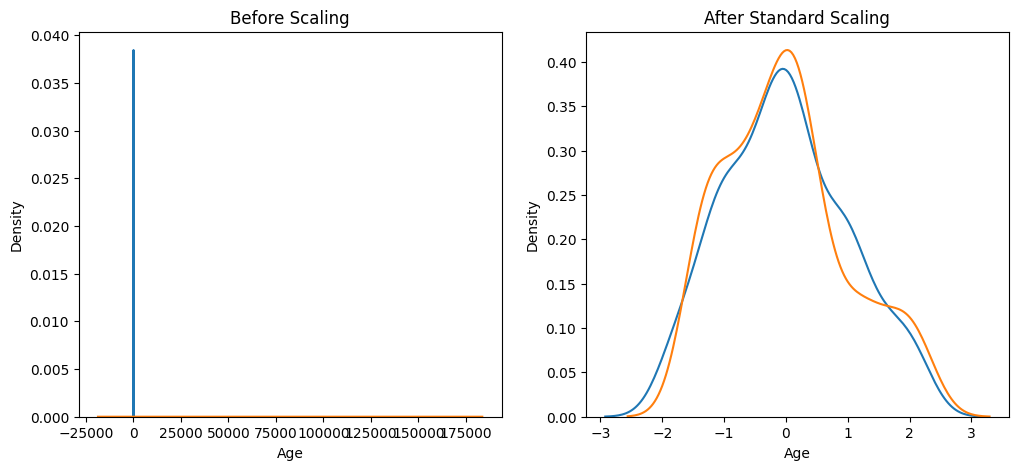

In [45]:
def plot_pdf():
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    # before scaling
    ax1.set_title('Before Scaling')
    sns.kdeplot(X_train['Age'], ax=ax1)
    sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)
    
    # after scaling
    ax2.set_title('After Standard Scaling')
    sns.kdeplot(X_train_scaled['Age'], ax=ax2)
    sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
    
    plt.show()
plot_pdf()

# Comparison of distribution

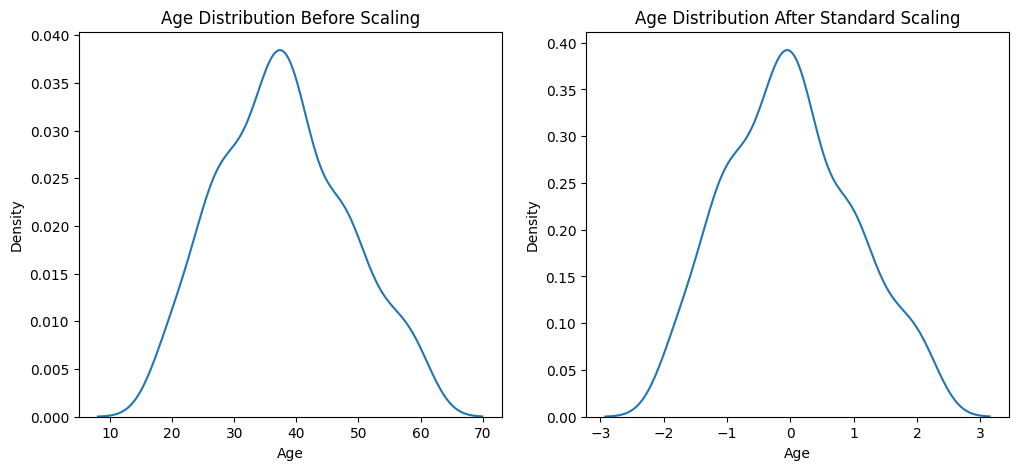

In [46]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

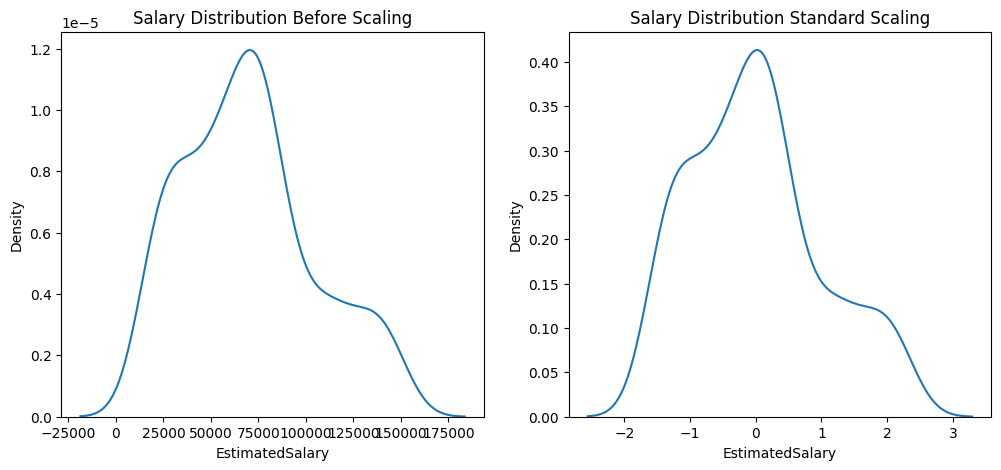

In [47]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()


## Benefit of scaled data

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [50]:
lr.fit(X_train,y_train);
lr_scaled.fit(X_train_scaled,y_train);

In [51]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


### no significant effect on decision tree algos

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [62]:
dt.fit(X_train,y_train);
dt_scaled.fit(X_train_scaled,y_train);

In [63]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [64]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.875


### There is no harm in applying standardization 
### There is no effect on outliers they remain outlier as it is

***

## When to use
1. Algos in which distance is calculated
   - `K Means Clustering`
   - `K Nearest Neighbours` (KNN)
2. `Principal Component analysis` (PCA) (try to get the feature with max variance)
3. `Gradient Descent``
4. `Artificial Neural Network` (Apply Gradient Descent)

***

## When no effect
1. Decision Tree (comparsion happens)
2. Random Forest
3. Gradient Boost
4. XG Boost

***